In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model



In [5]:
df = pd.read_csv(r'C:\Users\pattargv\Downloads\Test_Data\houseprice1.csv')
df

,area,bedrooms,age,price
0,1000,3.0,20,550000
1,1500,4.0,15,590000
2,2300,3.0,12,610000
3,3540,NaN,18,540000
4,4120,4.0,30,510000
5,4560,4.0,8,690000
6,5490,5.0,2,720000


In [6]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [8]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,1000,3.0,20,550000
1,1500,4.0,15,590000
2,2300,3.0,12,610000
3,3540,4.0,18,540000
4,4120,4.0,30,510000
5,4560,4.0,8,690000
6,5490,5.0,2,720000


In [9]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
reg.coef_

array([   11.46333602, -5179.85031957, -7617.37496593])

In [11]:
reg.intercept_

698805.8051796824

In [13]:
reg.predict([[3200,3,12]])

array([628540.42989141])

In [16]:
reg.predict([[4500,4,8]])

array([668732.4162606])

In [18]:
hiring = pd.read_csv(r'C:\Users\pattargv\Downloads\Test_Data\hiring.csv')
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [25]:
hiring['experience'][1]= 'zero'

c:\users\pattargv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
hiring['experience']

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [30]:
median1 = hiring['test_score(out of 10)'].median()

In [64]:
hiring['test_score(out of 10)'] = hiring['test_score(out of 10)'].fillna(median1)

In [65]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [66]:
hiring.experience = hiring.experience.apply(w2n.word_to_num)
hiring.experience

ValueError: Type of input is not string! Please enter a valid number word (eg. 'two million twenty three thousand and forty nine')

In [48]:
#t = w2

NameError: name 'w2' is not defined

In [67]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [68]:
#hiring.rename(columns={'interview_score(out of 10':'interview_score(out of 1'})
reg.fit(hiring[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], hiring[['salary($)']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
reg.predict([[12,10,10]])

array([[92002.18340611]])

In [77]:
reg.predict([[2,9,6]])

array([[53205.96797671]])

In [78]:
hr = pd.read_csv(r"C:\Users\pattargv\Downloads\Test_Data\HR_salary.csv")
hr.head(5)

,Name,Gender,Department,Salary,Rating
0,Ches Bonnell,Male,Sales,88050,Very Good
1,Garwin Peasegood,Female,Engineering,68220,Good
2,Saunders Blumson,Not Revealed,Legal,56370,Very Good
3,Gardy Grigorey,Female,Support,107090,Poor
4,Marlie Charsley,Male,Support,108450,Poor


In [89]:
hr.replace({'Very Good': 5,'Good':4, 'Average':3,'Poor':2, 'Very Poor':1, 'Not Rated':0},inplace=True)
hr.replace({'Male':1,'Female': 2, 'Not Revealed': 3}, inplace=True) 

In [90]:
hr.head(5)

,Name,Gender,Department,Salary,Rating
0,Ches Bonnell,1,Sales,88050,5
1,Garwin Peasegood,2,Engineering,68220,4
2,Saunders Blumson,3,Legal,56370,5
3,Gardy Grigorey,2,Support,107090,2
4,Marlie Charsley,1,Support,108450,2


In [98]:
mapping = {'Accounting':1,'Accounts': 1, 'Business Development': 2, 'Engineering': 3, 'Human Resources': 4, 'Legal': 5, 'Marketing':6, 'Product Management': 7, 'Research and Development':8, 'Sales':9, 'Services': 10, 'Support':11, 'Training':12}
hr.replace(mapping, inplace=True)

In [99]:
reg.fit(hr[['Gender','Department','Rating']],hr.Salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
reg.predict([[1,9,5]])

array([74680.74704772])

In [102]:
reg.predict([[2,3,4]])

array([73730.23724822])

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
hr['Department'].unique().sort()
#hr.Salary.plot()

In [118]:
hr.sort_values(by='Department', ascending=False)

,Name,Gender,Department,Salary,Rating
437,Myrilla Mercik,2,12,96660,3
364,Harwilll Domotor,1,12,112370,3
629,Felita Whitloe,1,12,63450,4
387,Angela Bangley,2,12,50810,0
637,Gretchen Callow,2,12,33920,3
102,Ewart Hovel,2,12,116770,4
101,Georg Dinnage,1,12,88330,2
224,Diarmid Alman,2,12,98200,2
98,Lindy Guillet,1,12,112780,2
654,Josie Barnson,2,12,74110,5


In [131]:
hr_dept = hr.groupby(by='Department')
hr_dept

In [135]:
for Department, Department_df in hr_dept:
    print(Department)
    print(Department_df)

1


KeyError: 0

In [137]:
Department_df['Salary'].mean()

75896.30769230769

In [140]:
Department_df['Salary'].max()


119930

In [141]:
Department_df['Salary'].min()

29610

                  Name  Gender  Department  Salary  Rating
22        Gavan Puttan       1           1   35940       4
51       Trace Sidsaff       2           1   51200       2
78    Monroe Hendrickx       1           1   34080       0
117  Judie Di Bernardo       1           1  117150       3
141      Haven Belward       1           1   89120       4
119930
29610
75896.30769230769


TypeError: unhashable type: 'numpy.ndarray'

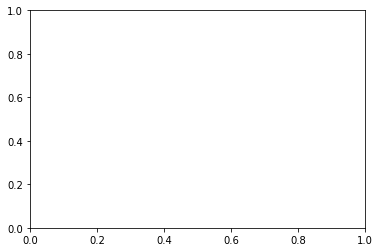

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

for Department, Department_df in hr_dept:
    #print(Department)
    print(Department_df)
    print(Department_df['Salary'].max())
    print(Department_df['Salary'].min())
    print(Department_df['Salary'].mean())
    plt.plot(Department_df)
    
    #Department_df.describe()

In [148]:
Department_df.corr().head()

,Gender,Department,Salary,Rating
Gender,1.000000,NaN,0.095306,0.138945
Department,NaN,NaN,NaN,NaN
Salary,0.095306,NaN,1.000000,0.134016
Rating,0.138945,NaN,0.134016,1.000000


In [154]:
import pickle

In [155]:
with open("model_pickle", "wb") as f:
    pickle.dump(reg, f)

In [156]:
with open("model_pickle", "rb") as f:
    mp = pickle.load(f)

In [157]:
reg.predict([[2,3,4]])

array([73730.23724822])

In [158]:
mp.predict([[2,3,4]])

array([73730.23724822])

In [159]:
from sklearn.externals import joblib

In [160]:
joblib.dump(reg,"model_joblib")

['model_joblib']

In [163]:
mj = joblib.load("model_joblib")

In [166]:
temp = mj.predict([[2,1,1]])

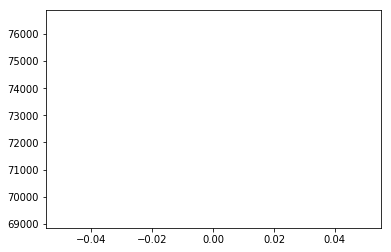

In [167]:
import matplotlib.pyplot as plt

plt.plot(temp)